# Movies and Statistics

This notebook guides you through a real application of Pandas to study gender bias in film scripts. In particular we want to ask whether gender is associated with the ages of characters, and whether the fraction of dialogue spoken by women changes significantly over historical time.

We'll do some "data munging" (reorganizing and summarizing the data) to produce a data frame that has all the information we need. Then we'll run some simple statistical tests.

We're drawing our data from [this blog post by Hannah Anderson and Matt Daniels](https://pudding.cool/2017/03/film-dialogue/). It organizes data for about 2000 screenplays, and reveals a number of patterns with gorgeous dataviz, but doesn't directly answer the question we want to pose.

However, the authors of the project also posted their data [on GitHub,](https://github.com/matthewfdaniels/scripts/) and I've placed it in this folder.

(This is mostly data on English-language film, but there are other sources out there; for instance, Prof. Rini Mehta in Comparative Literature has been [visualizing patterns](https://observablehq.com/@rbhttchr/25-heroes-of-hindi-cinema-1931-2020) in [Indian cinema.](https://observablehq.com/@rbhttchr/indian-cinemas-babel))

We start by importing the modules we need. Because the word "pandas" is long if you have to type it a lot, it's conventionally imported *as* pd.

I'm also going to import a basic graphics library ("pyplot") that I'll use to put some titles on graphs, draw a few lines on them, etc.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path

### Meet your data

The data, as made available by Anderson and Daniels, is in two separate tables. One table has a row for each *character,* and lists the character's gender, along with their age, and the number of words they speak in the movie.


In [2]:
charpath = Path('../../data/pudding/pudding_characters.csv')
chars = pd.read_csv(charpath, encoding = 'utf-8')
chars.head()

,script_id,imdb_character_name,words,gender,age
0,280,betty,311,f,35.0
1,280,carolyn johnson,873,f,NaN
2,280,eleanor,138,f,NaN
3,280,francesca johns,2251,f,46.0
4,280,madge,190,f,46.0


In [3]:
chars.shape

(23048, 5)

When you first load a dataset, it's often a good idea to look at its ```.head()``` and ```.shape```. You might also get summary statistics using ```.describe()```.

In [4]:
chars.describe(include = 'all')

,script_id,imdb_character_name,words,gender,age
count,23048.000000,23046,23048.000000,23048,18263.000000
unique,NaN,17613,NaN,3,NaN
top,NaN,doctor,NaN,m,NaN
freq,NaN,36,NaN,16132,NaN
mean,4194.784623,NaN,907.871486,NaN,42.382960
std,2472.985787,NaN,1399.593759,NaN,59.718859
min,280.000000,NaN,101.000000,NaN,3.000000
25%,2095.000000,NaN,193.000000,NaN,30.000000
50%,3694.000000,NaN,396.000000,NaN,39.000000
75%,6219.750000,NaN,980.000000,NaN,50.000000


Do you notice anything strange about the maximum age of the characters?

Some of them are rather old.

#### EXERCISE 1

Working in pairs or groups of three, find how many characters are more than a thousand years old. Look at the names of all characters older than 1000 to see if there is some valid reason for this. (Like, is the character named "Vampire King" or "The Ancient Dragon"? Or does the age seem more likely to be a data entry error?) 
Remove all characters older than 1000 unless there is some obvious justification for their advanced age.

In [5]:
# code goes here

After you're done removing people who are more than a thousand years old with no obvious excluse, the descriptive statistics should look more like this:

In [9]:
chars.describe(include = 'all')

,script_id,imdb_character_name,words,gender,age
count,23032.000000,23030,23032.000000,23032,18247.000000
unique,NaN,17601,NaN,3,NaN
top,NaN,doctor,NaN,m,NaN
freq,NaN,36,NaN,16120,NaN
mean,4195.230245,NaN,908.359587,NaN,40.666466
std,2473.302275,NaN,1399.955122,NaN,14.358053
min,280.000000,NaN,101.000000,NaN,3.000000
25%,2095.000000,NaN,193.000000,NaN,30.000000
50%,3694.000000,NaN,397.000000,NaN,39.000000
75%,6234.000000,NaN,981.250000,NaN,50.000000


#### QUESTIONS

**1) Why did the mean age change much more than the median (that's to say, the 50% value for age)?**

**2) There are some interesting questions about the way this data was generated.** "Age" really means the age of the actor who was portraying a character; it's not necessarily the fictive age of the character, which is often not specified. 

Gender was determined in the same way: it's the gender identification of the actor who portrayed a character. What limitations does this approach have? What other approaches could you take, and what advantages or disadvantages would *they* have?

-------

These are legitimate questions, but there are even bigger questions about this data. It has strong selection biases (e.g., it relies on digitized scripts), and we would need to investigate those biases before we could confidently affirm that generalizations about this data reflect the real history of film, even in North America. But we don't need to affirm that. Our goal here is not to make claims about film history! For the moment, it is just to practice inferential statistics with pandas. 

If you wonder how much this data does reflect the real world, you can consult [the project's FAQ page,](https://medium.com/@matthew_daniels/faq-for-the-film-dialogue-by-gender-project-40078209f751) where Daniels bravely faces "death from a thousand nitpicks."

We've looked at a table of characters. There's also a second table of films. This has a row for each movie (```script_id```) and lists titles, along with release year and gross, in inflation-adjusted millions of dollars.

In [10]:
moviepath = Path('../../data/pudding/pudding_movies.csv')
movies = pd.read_csv(moviepath, encoding = 'utf-8')
movies.head()

,script_id,imdb_id,title,year,gross,lines_data
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774780000000000000000000000000000000...
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274530000000000000000000000000000000...
2,1514,tt0417385,12 and Holding,2005,NaN,5461357777754220000000000000000000000000000000...
3,1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777780000000000000000000000000000000...
4,1520,tt1542344,127 Hours,2010,20.0,453513352345766000000000000000


Ignore ```lines_data```; it's an idiosyncratic way to represent changing gender proportions across script time.
In fact, let's drop that column.

In [11]:
movies = movies.drop(columns='lines_data')

## Selecting subsets of a data frame

Part of this was covered in Melanie Walsh's introduction to Pandas, but let's review quickly, and go a little further. I encourage you to change the string values in the following code, and experiment with selecting different films.

First, let's select a column.

In [12]:
movies['title']

0             (500) Days of Summer
1       10 Things I Hate About You
2                   12 and Holding
3                 12 Years a Slave
4                        127 Hours
                   ...            
1995               Youth in Revolt
1996              Zero Dark Thirty
1997                   Zero Effect
1998                    Zerophilia
1999                        Zodiac
Name: title, Length: 2000, dtype: object

Now select rows, using the 'filter' technique that Walsh demonstrates.

In [13]:
matrix_title_filter = movies['title'] == 'The Matrix'
movies[matrix_title_filter]

,script_id,imdb_id,title,year,gross
1690,1141,tt0133093,The Matrix,1999,292.0


Now we that we have the script_id for *The Matrix,* we can select characters from that movie, necause there's also a ```script_id``` column in the ```chars``` data frame.

#### EXERCISE 2

Find all the characters in the ```chars``` data frame who appear in *The Matrix*.

In [1]:
# code goes here

### Using .loc to select by row and column at once

Suppose we want to write code that will do what you did above for *The Matrix*--but do it automatically, for any movie title.

That is, we want to

1) allow a user to input a movie title,

2) get the script id for that movie from the movie dataframe, and

3) select characters matching the script id from the chars dataframe.

In order to do that, we need a way to do what you did visually by selecting the script_id from the row for *The Matrix*. In other words, we need to limit by row and column at the same time.

Dataframes have a method ```.loc,``` for "location," that allows you to do this. Unlike most Pandas methods, it takes square brackets (not parentheses). Inside the brackets, the first element specifies row(s), the second column(s). We can get both the title and script id:

In [15]:
movies.loc[movies['title'] == 'Slumdog Millionaire', ['title', 'script_id']]

,title,script_id
1313,Slumdog Millionaire,3365


Or just the script id:

In [16]:
script_id = movies.loc[movies['title'] == 'Slumdog Millionaire', 'script_id']
print(script_id)

1313    3365
Name: script_id, dtype: int64


Notice, however, that you can't do what you might expect to do with the result of .loc. The command below should create an error, although it may create different errors in different versions.

In [17]:
chars[chars['script_id'] == script_id]

ValueError: Can only compare identically-labeled Series objects

The problem is that our variable ```script_id``` is not just an integer. It's actually a pandas Series. This means that it has an *index* as well as a value.

In [18]:
print(type(script_id))
print(script_id.index)

<class 'pandas.core.series.Series'>
Int64Index([1313], dtype='int64')


If we're only interested in the numeric value of the script id, we need to explicitly extract that.

In [19]:
print(script_id.values)
print(script_id.values[0])

[3365]
3365


So this is the slightly complicated syntax for "find all rows where the title is 'Slumdog Millionaire,' then give me the first script_id."

In [20]:
movies.loc[movies['title'] == 'Slumdog Millionaire', 'script_id'].values[0]

3365

Now you can write a block of code that

1) allows a user to input a movie title,

2) gets the script id for that movie from the movie dataframe, and

3) selects characters matching the script id from the chars dataframe.

#### EXERCISE 3:

In [ ]:
# code goes here

## Simple descriptive statistics and dataviz

So, from Melanie Walsh's Introduction to Pandas, we already know how to generate simple descriptive statistics. For instance,

In [21]:
chars['age'].describe()

count    18247.000000
mean        40.666466
std         14.358053
min          3.000000
25%         30.000000
50%         39.000000
75%         50.000000
max        102.000000
Name: age, dtype: float64

Tells us that there's some character in the data with an age of 2013. Whether a vampire or a data error I leave it to the reader to determine.

We can also identify the number of men and women in the dataset as a whole:

In [22]:
chars['gender'].value_counts()

m    16120
f     6907
?        5
Name: gender, dtype: int64

Pandas also has built-in dataviz functions that make it easy to generate simple graphs. For instance, it's easy to create a bar plot to visualize the table above. 

<AxesSubplot:title={'center':'Gender proportions'}>

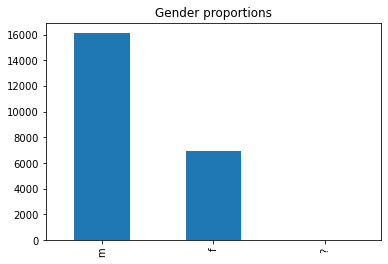

In [23]:
chars['gender'].value_counts().plot(kind='bar', title='Gender proportions')

If we want to study the distribution of ages, a histogram makes it easy. You can specify the number of bins in the histogram. Notice also the ```pyplot``` function I'm using to set the title.

Text(0.5, 1.0, 'Histogram of character ages')

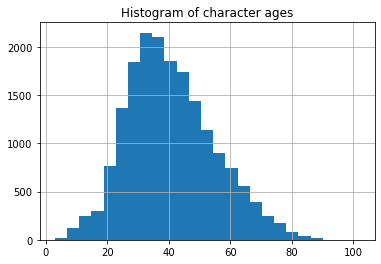

In [24]:
chars['age'].hist(bins = 25)
plt.title('Histogram of character ages')

#### EXERCISE 4:

Generate two different histograms, visualizing age distribution for men and for women.

First for women:

In [2]:
# code goes here

and for men:

In [3]:
# code goes here

### Inferential statistics: how to test a difference of means

Those distributions look a little different visually, but seem to be centered *roughly* in the same place (roughly, our thirties or early forties). Are they significantly different, or could the differences be explained by chance? One simple way to pose this question is to ask how likely it is that these two samples came from populations with the same age distribution. Or to put it a little more narrowly: how likely is it that they came from populations with the same mean age?

The Python for this test is very simple: it's called a "t test," and we could do it in one line of code. But I don't want to just rehearse a formula here; I'd like to review the mental model we're applying when we perform a statistical test of this kind.

H<sub>0</sub> (null hypothesis): the mean age for male characters (in the whole population) is the same as for women.

H<sub>A</sub> (alternative hypothesis): the mean age for women is different than for men.

We can already guess that "different" here is likely to mean "female characters are younger on average," but since I didn't formulate a specific directional hypothesis before inspecting the data I'm going to be conservative and make this a "two-tailed" test, which means that we're going to consider the probability that random sampling variation would produce a difference of means equal to the observed one in *either* direction. We'll be unable to dismiss the null hypothesis if that probability is .05 or higher.

So first of all, what actually is the size of the difference between sample means?

In [27]:
chars.loc[chars['gender'] == 'm', 'age'].describe()

count    12751.000000
mean        42.669908
std         14.082256
min          3.000000
25%         33.000000
50%         42.000000
75%         52.000000
max        102.000000
Name: age, dtype: float64

In [28]:
chars.loc[chars['gender'] == 'f', 'age'].describe()

count    5494.000000
mean       36.000910
std        13.881183
min         4.000000
25%        26.000000
50%        33.000000
75%        43.000000
max        92.000000
Name: age, dtype: float64

The difference between ~42.67 and 36 is approximately 6.67 years.

How often would that difference occur by chance, if both samples were drawn from a population with the same age distribution?

We could use statistical formulas here, but to give you an intuitive sense of what's actually happening, let's simulate the *sampling distribution* of the mean ages we would get if gender made no difference in age. In that case our our "ages of men" and "ages of women" would simply be two random samples drawn from the same underlying population, "ages of all characters." There would still be some difference in their means. How often would that difference be equal to or larger than 6.7 years?

Of course, we can't really sample all characters in film. We don't have a list of all characters! But it turns out that you can get a very good simulation of sampling variation in a population by randomly *resampling* an existing sample. 

There are a variety of ways to do the resampling; here we're going to do a "permutation test." We'll combine the ages of all characters into a single pool. 

We're going to exclude characters with ```NaN``` as their age. Notice that when we combine two Boolean conditions in Pandas, we need to surround each one with parentheses.

In [29]:
mensages = chars.loc[(chars['gender'] == 'm') & (chars['age'].notna()), 'age']
womensages = chars.loc[(chars['gender'] == 'f') & (chars['age'].notna()), 'age']
print('We have ', len(womensages), ' women and ', len(mensages), ' men in our data.')
charactersages = womensages.append(mensages)  # Note that we're appending Series rather than lists
                                              # If these were regular lists, you'd need to "extend" instead.

We have  5494  women and  12751  men in our data.


Now we can simulate what would happen if the ages of men and women were drawn from the same distribution. 

We'll reshuffle the pool ten thousand times. Each time, we'll divide it into two random groups (since in this simulation, gender makes no difference to age distribution). We'll call the first 5,494 ages "women" and the next 12,751 "men." Finally, we'll take the difference of means between the two groups, and keep track of all the differences we get. We'll get thousand differences! How will they be distributed?

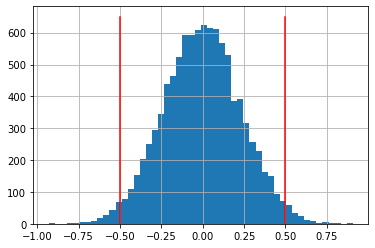

In [30]:
tenthousanddiffs = []

division = len(womensages)

for i in range(10000):
    thissample = charactersages.sample(frac = 1.0, replace = False)  # frac = 1.0 just says "a sample of equal length"
                                                                     # i.e., reshuffle the list
    women = thissample[0: division]
    men = thissample[division: ]
    diff = men.mean() - women.mean()
    tenthousanddiffs.append(diff)
    
tenthousanddiffs = pd.Series(tenthousanddiffs) # To use the .hist() plotting method
                                               # we need to turn this list into a pandas
                                               # object, like a single column of a data frame.
                                               # This is called a Series.
tenthousanddiffs.hist(bins = 50)
plt.plot([-0.5, -0.5], [0, 650], 'red')
plt.plot([0.5, 0.5], [0, 650], 'red')

This is the range of differences we would get through random sampling variation. 

We can ask how often the absolute difference of samples is greater than any value. For instance, how often would we randomly get differences of half a year or more between the mean ages of the two groups? We can find out by looking at the two "tails" of the above distribution, above 0.5  and below -0.5. How many samples are we talking about?

In [31]:
tailcount = sum(abs(tenthousanddiffs) > .5)
print("That happens ", tailcount, "times, for a probability of ", tailcount / 10000)

That happens  315 times, for a probability of  0.0315


**QUESTION:** Why are we dividing by 10,000?

What about the actual difference we observed?

In [32]:
observeddiff = mensages.mean() - womensages.mean()
print("The observed difference of means was", observeddiff)

tailcount = sum(abs(tenthousanddiffs) > observeddiff)
print("That happens ", tailcount, "times, for a probability of ", tailcount / 10000)

The observed difference of means was 6.668998158763081
That happens  0 times, for a probability of  0.0


In short, it's *very* unlikely that we could get two samples like this from the same population.

Here's a shortcut way of doing the same calculation. (There are technically some differences here, because the formula used in a t test assumes that the distribution of ages is *roughly* shaped like a bell curve. The permutation test we performed is actually a little more flexible. But it's a small difference in this case, because fictional ages are close enough to a bell curve.)

In [33]:
from scipy.stats import ttest_ind
ttest_ind(mensages, womensages)

Ttest_indResult(statistic=29.470985559007072, pvalue=1.5605919504523837e-186)

The ```pvalue``` there is estimating the probability of getting a difference this extreme if there were in reality no difference between the population means. Again, it's a very low probability. The exponent is -186!

### Grouping and summarizing data

You can see above that men outnumber women on film. The amount of dialogue assigned to the two groups is also unequal. In part that's simply because there are more men.

But it's even more unequal than we would expect from the sheer number of men and women. The *average* amount of dialogue is also unequal.

In [34]:
chars.groupby('gender', as_index = False)['words'].mean()

,gender,words
0,?,281.400000
1,f,850.853482
2,m,933.193921


Women speak on average 851 words per film in this dataset; men 933.

Notice how we used the ```.groupby()``` function to figure this out. It divides a Pandas dataframe into subframes based on the value of the column we pass in as a parameter. Once we've done that we can select a column ```['words']``` in all of those subframes, and calculate the mean value of the column.

To understand how ```.groupby()``` works, it may be helpful to iterate through the ```label, dataframe``` pairs it produces: 

In [35]:
grouped_frames = chars.groupby('gender', as_index = False)
for label, dataframe in grouped_frames:
    print(label)
    print(dataframe.head())

?
       script_id imdb_character_name  words gender   age
7325        2510            tiny tim    488      ?   NaN
8010        2682     himself - walki    312      ?  90.0
8011        2682     himself - with     224      ?  78.0
16902       6053     Thomas Hergenro    216      ?   NaN
18812       7177               randy    167      ?   NaN
f
   script_id imdb_character_name  words gender   age
0        280               betty    311      f  35.0
1        280     carolyn johnson    873      f   NaN
2        280             eleanor    138      f   NaN
3        280     francesca johns   2251      f  46.0
4        280               madge    190      f  46.0
m
    script_id imdb_character_name  words gender   age
5         280     michael johnson    723      m  38.0
6         280      robert kincaid   1908      m  65.0
7         623        bobby korfin    328      m   NaN
9         623     deputy chief fi    347      m   NaN
10        623     detective eddie   2020      m  58.0


By the way, how often would we see a difference as big as 851 and 933 if volubility were in fact equally distributed?

This will become a question in the homework.

## Merging dataframes

Suppose we want to inquire about the relation between the amount of money a movie makes, and the proportion of dialogue spoken by women. It's going to be very hard to do this with our existing two dataframes, because the ```gross``` income column is in the ```movies``` dataframe, whereas the ```words``` column is in the ```chars``` dataframe.

In [36]:
movies.head(3)

,script_id,imdb_id,title,year,gross
0,1534,tt1022603,(500) Days of Summer,2009,37.0
1,1512,tt0147800,10 Things I Hate About You,1999,65.0
2,1514,tt0417385,12 and Holding,2005,NaN


In [37]:
chars.head(3)

,script_id,imdb_character_name,words,gender,age
0,280,betty,311,f,35.0
1,280,carolyn johnson,873,f,NaN
2,280,eleanor,138,f,NaN


We need to merge them into one. Fortunately we can do that, because the ```script_id``` column is present in both dataframes.

In [38]:
pd.merge(chars, movies, on = 'script_id')

,script_id,imdb_character_name,words,gender,age,imdb_id,title,year,gross
0,280,betty,311,f,35.0,tt0112579,The Bridges of Madison County,1995,142.0
1,280,carolyn johnson,873,f,NaN,tt0112579,The Bridges of Madison County,1995,142.0
2,280,eleanor,138,f,NaN,tt0112579,The Bridges of Madison County,1995,142.0
3,280,francesca johns,2251,f,46.0,tt0112579,The Bridges of Madison County,1995,142.0
4,280,madge,190,f,46.0,tt0112579,The Bridges of Madison County,1995,142.0
...,...,...,...,...,...,...,...,...,...
23027,9254,lumiere,1063,m,56.0,tt0101414,Beauty and the Beast,1991,452.0
23028,9254,maurice,1107,m,71.0,tt0101414,Beauty and the Beast,1991,452.0
23029,9254,monsieur d'arqu,114,m,58.0,tt0101414,Beauty and the Beast,1991,452.0
23030,9254,mrs. potts,564,f,66.0,tt0101414,Beauty and the Beast,1991,452.0


By default Pandas performs what is called an 'inner join.' That is, the resulting dataframe will only have rows corresponding to script ids that were present in both dataframes.

We can save this result in a variable and do fun things with it.

For instance, we can group it by gender and title and then calculate the proportion of dialogue spoken by women in each movie.

Technically, we can group by two variables at once.

In [39]:
merged = pd.merge(chars, movies, on = 'script_id')
grouped = merged.groupby(['title', 'gender']).sum()
grouped

script_id  words    age   year   gross
title                      gender                                        
(500) Days of Summer       f            7670   5738  148.0  10045   185.0
                           m           12272  12762  230.0  16072   296.0
10 Things I Hate About You f            6048   8992   88.0   7996   260.0
                           m           12096  10688  219.0  15992   520.0
12 Years a Slave           f            9102   3452  161.0  12078   360.0
...                                      ...    ...    ...    ...     ...
Zodiac                     m          155784  13235  974.0  48168   984.0
eXistenZ                   f           13946   3752   57.0   3998     8.0
                           m           48811   5695  252.0  13993    28.0
xXx                        f            1497    998   27.0   2002   211.0
                           m           11976   7287  256.0  16016  1688.0

[3936 rows x 5 columns]

But that creates a two-level index--called a MultiIndex--which is a little tricky to work with. It may be conceptually simpler to divide the merged dataframe by gender, then group.

In [40]:
malewordsbytitle = merged.loc[merged['gender'] == 'm', : ].groupby('title', as_index = False).sum()
malewordsbytitle.head(3)

,title,script_id,words,age,year,gross
0,(500) Days of Summer,12272,12762,230.0,16072,296.0
1,10 Things I Hate About You,12096,10688,219.0,15992,520.0
2,12 Years a Slave,33374,16176,551.0,44286,1320.0


In [41]:
femalewordsbytitle = merged.loc[merged['gender'] == 'f', : ].groupby('title', as_index = False).sum()
femalewordsbytitle.head(3)

,title,script_id,words,age,year,gross
0,(500) Days of Summer,7670,5738,148.0,10045,185.0
1,10 Things I Hate About You,6048,8992,88.0,7996,260.0
2,12 Years a Slave,9102,3452,161.0,12078,360.0


Now we can merge these two frames using an *outer* join, which will create rows for all titles present in either dataframe. This is important because we want to have zeroes in cases where men or women don't speak at all in a movie. We don't want those rows just to be missing.

We can also add suffixes, so we understand which columns are coming from the dataframe associated with men or with women.

In [42]:
wordsbytitle = femalewordsbytitle.merge(malewordsbytitle, on = 'title', how = 'outer', suffixes = ['_women', '_men'])

In [43]:
wordsbytitle.sample(12)

,title,script_id_women,words_women,age_women,year_women,gross_women,script_id_men,words_men,age_men,year_men,gross_men
300,Chasing Sleep,5979.0,3328.0,59.0,6000.0,0.0,15944.0,12654.0,188.0,16000.0,0.0
1668,The Pelican Brief,14334.0,3004.0,26.0,5979.0,636.0,47780.0,5229.0,477.0,19930.0,2120.0
781,K-PAX,17952.0,1445.0,131.0,8004.0,308.0,49368.0,7243.0,404.0,22011.0,847.0
263,Burn After Reading,2355.0,2471.0,138.0,6024.0,219.0,7850.0,5827.0,299.0,20080.0,730.0
125,Arlington Road,31200.0,2103.0,72.0,7996.0,164.0,46800.0,8457.0,148.0,11994.0,246.0
1879,We Own the Night,1465.0,623.0,33.0,2007.0,36.0,14650.0,7284.0,455.0,20070.0,360.0
154,Bad Meat,23691.0,1483.0,59.0,6033.0,0.0,71073.0,3570.0,125.0,18099.0,0.0
1349,Street Fighter: The Legend of Chun-Li,19155.0,2038.0,124.0,6027.0,30.0,44695.0,4654.0,282.0,14063.0,70.0
686,House on Haunted Hill,8756.0,1816.0,49.0,3998.0,138.0,17512.0,4963.0,149.0,7996.0,276.0
1958,Jeremiah Johnson,NaN,NaN,NaN,NaN,NaN,56840.0,4707.0,264.0,13804.0,0.0


Now we want to do two things:
    
    1. Simplify this table so it only has the relevant columns. The sums of age and script id are meaningless.
    
    2. Replace NaNs with zeroes.

In [44]:
wordsbytitle = wordsbytitle.loc[ : , ['title', 'words_men', 'words_women']]

In [45]:
sum(wordsbytitle['words_women'].isna())

54

In [46]:
wordsbytitle = wordsbytitle.fillna(0)

Let's create a column that reports the *fraction* of dialogue in a given movie spoken by women.

In [49]:
wordsbytitle = wordsbytitle.assign(frac_women = wordsbytitle['words_women'] / 
                                     (wordsbytitle['words_women'] + wordsbytitle['words_men']))

In [48]:
wordsbytitle.head()

,title,words_men,words_women,frac_women
0,(500) Days of Summer,12762.0,5738.0,0.310162
1,10 Things I Hate About You,10688.0,8992.0,0.456911
2,12 Years a Slave,16176.0,3452.0,0.175871
3,12 and Holding,10644.0,5324.0,0.333417
4,127 Hours,4336.0,809.0,0.157240


Now if we merge this data with our original ```movies``` dataframe, we can compare this fraction to variables like release year and gross income.

In [188]:
titledata = wordsbytitle.merge(movies, on = 'title')
titledata

,title,words_men,words_women,frac_women,script_id,imdb_id,year,gross
0,(500) Days of Summer,12762.0,5738.0,0.310162,1534,tt1022603,2009,37.0
1,10 Things I Hate About You,10688.0,8992.0,0.456911,1512,tt0147800,1999,65.0
2,12 Years a Slave,16176.0,3452.0,0.175871,1517,tt2024544,2013,60.0
3,12 and Holding,10644.0,5324.0,0.333417,1514,tt0417385,2005,NaN
4,127 Hours,4336.0,809.0,0.157240,1520,tt1542344,2010,20.0
...,...,...,...,...,...,...,...,...
1995,The Revenant,5396.0,0.0,0.000000,8257,tt1663202,2015,147.0
1996,The Shawshank Redemption,13414.0,0.0,0.000000,3317,tt0111161,1994,58.0
1997,The Thin Red Line,18458.0,0.0,0.000000,9177,tt0120863,1998,67.0
1998,The Wild Bunch,8864.0,0.0,0.000000,1475,tt0065214,1969,NaN


### Inferential statistics with Pearson correlation.

In [186]:
from scipy.stats import pearsonr

In [4]:
# code goes here